In [1]:

import math, scipy, pylab
import glob, os
import matplotlib.pyplot as plt
import re, operator
import time
from lmfit.models import StepModel, Model
from tqdm import tqdm
import numpy as np
from numpy import loadtxt
import pandas as pd


In [2]:
#import data

df = pd.read_excel(r'D:\PC\Desktop\Corona\coronadata.xlsx')
#print(df)
x = df['Dia Ano']
ysuspeitos = df['Suspeitos']
yconfirmados = df['Confirmados']


[[Model]]
    Model(step, form='logistic')
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 2131
    # data points      = 18
    # variables        = 3
    chi-square         = 512.324341
    reduced chi-square = 34.1549560
    Akaike info crit   = 66.2745506
    Bayesian info crit = 68.9456659
[[Variables]]
    amplitude:  3113061.07 +/- 1.1628e+09 (37353.21%) (init = 15000)
    center:     103.392974 +/- 1118.28357 (1081.59%) (init = 100)
    sigma:      2.99058792 +/- 0.12234872 (4.09%) (init = 1.1)
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, center) =  1.000
    C(center, sigma)     =  0.948
    C(amplitude, sigma)  =  0.948
[[Model]]
    Model(step, form='logistic')
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 30
    # data points      = 18
    # variables        = 3
    chi-square         = 332322.024
    reduced chi-square = 22154.8016
    Akaike info crit   = 182.822784
    Bayesian info cri

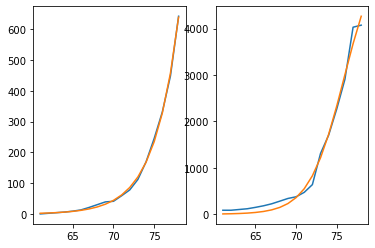

In [3]:
# fit data to confirmed

coronaconf = StepModel(form='logistic')

parameters = coronaconf.make_params()
parameters.add('amplitude', value=15000  )#, min=10000, max=20000)
parameters.add('center', value=100)
parameters.add('sigma', value=1.10  )#, max=3)

#pars = coronaconf.guess(yconfirmados, x=x)

outputconf = coronaconf.fit(yconfirmados, parameters, x=x)
print(outputconf.fit_report())

# fit data to suspects 

coronasusp = StepModel(form='logistic')
'''
param = coronasusp.make_params()
param.add('amplitude', value=15000  )#, min=10000, max=20000)
param.add('center', value=100)
param.add('sigma', value=1.10  )#, max=3)
'''
param = coronasusp.guess(ysuspeitos, x=x)

outputsusp = coronasusp.fit(ysuspeitos, param, x=x)
print(outputsusp.fit_report())

# figures

plt.figure('Corona')
plt.subplot(1,2,1)
plt.plot(x, yconfirmados)
plt.plot(x, outputconf.best_fit)
plt.subplot(1,2,2)
plt.plot(x, ysuspeitos)
plt.plot(x, outputsusp.best_fit)
plt.show()